___
# Ciência dos Dados - PROJETO 1

Iago Rainha Mendes
___

## Influência da Renda sobre o acesso a informação

___
## Introdução

Meu estudo busca descobrir a influencia que a renda tem sobre o acesso a informação e como isso variou ao longo de três anos.

Podemos comparar as porcentagens presentes em cada grafico para ver a variação da relação entre renda e acesso a informação.

___
## Análise e Resultados

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Dell\Desktop\Insper\2017.2\Ciência dos Dados\CD17-Iago


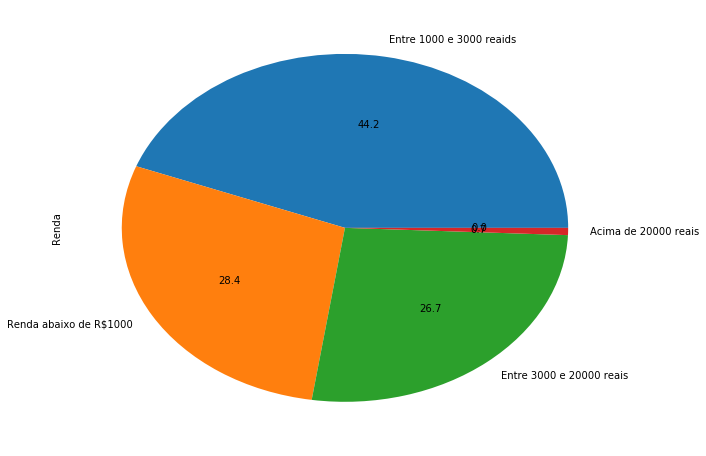

In [3]:
#DADOS DE 2013
dados_2013 = pd.read_csv('DOM2013.csv',sep=',')
dados_2013 = pd.DataFrame(dados_2013)
dados_2013_35 = dados_2013.loc[dados_2013.UF == 35]
dados_2013 = dados_2013.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","V4621"]]
dados_2013 = dados_2013[pd.notnull(dados_2013.V0220) &\
                        pd.notnull(dados_2013.V02272) &\
                        pd.notnull(dados_2013.V02322) &\
                        pd.notnull(dados_2013.V02424) &\
                        pd.notnull(dados_2013.V02426) &\
                        pd.notnull(dados_2013.V4621)]


dados_2013 = dados_2013.loc[(dados_2013.UF == 35) &\
                            (dados_2013.V0220 == 2) &\
                            (dados_2013.V02272 == 1) &\
                            (dados_2013.V02322 == 2) &\
                            (dados_2013.V02424 == 2) &\
                            (dados_2013.V02426 == 2) &\
                            (dados_2013.V4621 != 999999999999)]

dados_2013.UF = dados_2013.UF.astype('category')
dados_2013.UF.cat.categories = {"São Paulo"}
dados_2013.V0220  = dados_2013.V0220.astype('category')
dados_2013.V0220.cat.categories = {"Sim"}
dados_2013.V02272 = dados_2013.V02272.astype('category')
dados_2013.V02272.cat.categories = {"Sim"}
dados_2013.V02322 = dados_2013.V02322.astype('category')
dados_2013.V02322.cat.categories = {"Sim"}
dados_2013.V02424 = dados_2013.V02424.astype('category')
dados_2013.V02424.cat.categories = {"Sim"}
dados_2013.V02426 = dados_2013.V02426.astype('category')
dados_2013.V02426.cat.categories = {"Sim"}

coluna_renda = pd.cut(dados_2013.V4621, bins=[-1,1000,3000,20000,615000]\
                                      , labels=["Renda abaixo de R$1000","Entre 1000 e 3000 reais","Entre 3000 e 20000 reais", "Acima de 20000 reais"])
dados_2013["Renda"] = coluna_renda
dados_2013 = dados_2013.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","Renda"]]
dados_2013 = dados_2013.rename(columns={"UF":"Estado",\
                                        "V0220":"Celular",\
                                        "V02272":"Televisão por assinatura",\
                                        "V02322":"Acesso a internet no próprio domicílio",\
                                        "V02424":"Acesso a internet por 3g ou 4g",\
                                        "V02426":"Acesso por banda larga"})  

dados_2013.to_csv("dados_2013menor.csv")
dados_2013.Renda = dados_2013.Renda.cat.add_categories(["Dado Indisponível"])
dados_2013.Renda.fillna("Dado Indisponível")
dados_2013.Renda.value_counts().plot(kind="pie", autopct="%.1f", figsize=(10,8))

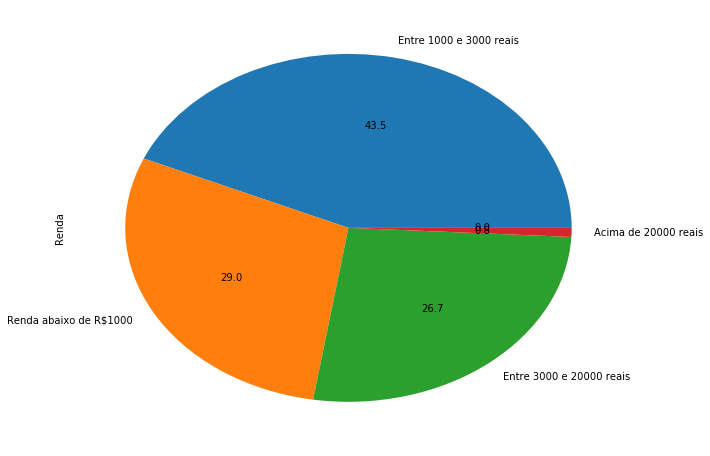

In [7]:
#DADOS DE 2014
dados_2014 = pd.read_csv('DOM2014.csv',sep=',')
dados_2014 = pd.DataFrame(dados_2014)
dados_2014_35 = dados_2014.loc[dados_2014.UF == 35]
dados_2014 = dados_2014.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","V4621"]]
dados_2014 = dados_2014[pd.notnull(dados_2014.V0220) &\
                        pd.notnull(dados_2014.V02272) &\
                        pd.notnull(dados_2014.V02322) &\
                        pd.notnull(dados_2014.V02424) &\
                        pd.notnull(dados_2014.V02426) &\
                        pd.notnull(dados_2014.V4621)]


dados_2014 = dados_2014.loc[(dados_2014.UF == 35) &\
                            (dados_2014.V0220 == 2) &\
                            (dados_2014.V02272 == 1) &\
                            (dados_2014.V02322 == 2) &\
                            (dados_2014.V02424 == 2) &\
                            (dados_2014.V02426 == 2) &\
                            (dados_2014.V4621 != 999999999999)]

dados_2014.UF = dados_2014.UF.astype('category')
dados_2014.UF.cat.categories = {"São Paulo"}
dados_2014.V0220  = dados_2014.V0220.astype('category')
dados_2014.V0220.cat.categories = {"Sim"}
dados_2014.V02272 = dados_2014.V02272.astype('category')
dados_2014.V02272.cat.categories = {"Sim"}
dados_2014.V02322 = dados_2014.V02322.astype('category')
dados_2014.V02322.cat.categories = {"Sim"}
dados_2014.V02424 = dados_2014.V02424.astype('category')
dados_2014.V02424.cat.categories = {"Sim"}
dados_2014.V02426 = dados_2014.V02426.astype('category')
dados_2014.V02426.cat.categories = {"Sim"}

coluna_renda = pd.cut(dados_2014.V4621, bins=[-1,1000,3000,20000,615000]\
                                      , labels=["Renda abaixo de R$1000","Entre 1000 e 3000 reais","Entre 3000 e 20000 reais", "Acima de 20000 reais"])
dados_2014["Renda"] = coluna_renda
dados_2014 = dados_2014.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","Renda"]]
dados_2014 = dados_2014.rename(columns={"UF":"Estado",\
                                        "V0220":"Celular",\
                                        "V02272":"Televisão por assinatura",\
                                        "V02322":"Acesso a internet no próprio domicílio",\
                                        "V02424":"Acesso a internet por 3g ou 4g",\
                                        "V02426":"Acesso por banda larga"})  

dados_2014.to_csv("dados_2014menor.csv")
dados_2014.Renda = dados_2014.Renda.cat.add_categories(["Dado Indisponível"])
dados_2014.Renda.fillna("Dado Indisponível")
dados_2014.Renda.value_counts().plot(kind="pie", autopct="%.1f", figsize=(10,8))

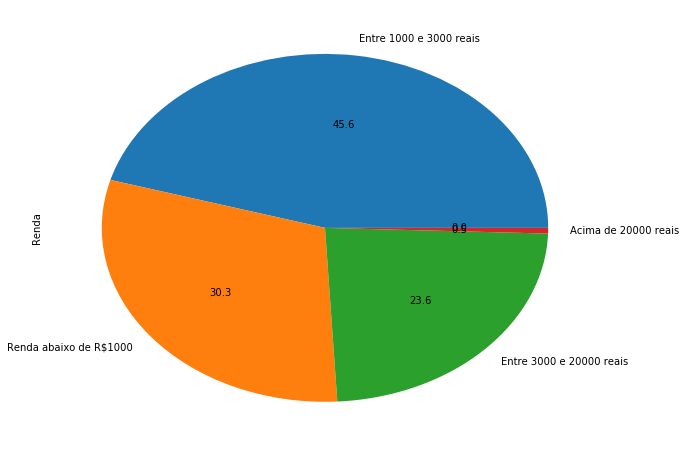

In [9]:
#DADOS DE 2015
dados_2015 = pd.read_csv('DOM2015.csv',sep=',')
dados_2015 = pd.DataFrame(dados_2015)
dados_2015_35 = dados_2015.loc[dados_2015.UF == 35]
dados_2015 = dados_2015.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","V4621"]]
dados_2015 = dados_2015[pd.notnull(dados_2015.V0220) &\
                        pd.notnull(dados_2015.V02272) &\
                        pd.notnull(dados_2015.V02322) &\
                        pd.notnull(dados_2015.V02424) &\
                        pd.notnull(dados_2015.V02426) &\
                        pd.notnull(dados_2015.V4621)]


dados_2015 = dados_2015.loc[(dados_2015.UF == 35) &\
                            (dados_2015.V0220 == 2) &\
                            (dados_2015.V02272 == 1) &\
                            (dados_2015.V02322 == 2) &\
                            (dados_2015.V02424 == 2) &\
                            (dados_2015.V02426 == 2) &\
                            (dados_2015.V4621 != 999999999999)]

dados_2015.UF = dados_2015.UF.astype('category')
dados_2015.UF.cat.categories = {"São Paulo"}
dados_2015.V0220  = dados_2015.V0220.astype('category')
dados_2015.V0220.cat.categories = {"Sim"}
dados_2015.V02272 = dados_2015.V02272.astype('category')
dados_2015.V02272.cat.categories = {"Sim"}
dados_2015.V02322 = dados_2015.V02322.astype('category')
dados_2015.V02322.cat.categories = {"Sim"}
dados_2015.V02424 = dados_2015.V02424.astype('category')
dados_2015.V02424.cat.categories = {"Sim"}
dados_2015.V02426 = dados_2015.V02426.astype('category')
dados_2015.V02426.cat.categories = {"Sim"}

coluna_renda = pd.cut(dados_2015.V4621, bins=[-1,1000,3000,20000,615000]\
                                      , labels=["Renda abaixo de R$1000","Entre 1000 e 3000 reais","Entre 3000 e 20000 reais", "Acima de 20000 reais"])
dados_2015["Renda"] = coluna_renda
dados_2015 = dados_2015.loc[:,["UF","V0220", "V02272","V02322","V02424","V02426","Renda"]]
dados_2015 = dados_2015.rename(columns={"UF":"Estado",\
                                        "V0220":"Celular",\
                                        "V02272":"Televisão por assinatura",\
                                        "V02322":"Acesso a internet no próprio domicílio",\
                                        "V02424":"Acesso a internet por 3g ou 4g",\
                                        "V02426":"Acesso por banda larga"})  

dados_2015.to_csv("dados_2015menor.csv")
dados_2015.Renda = dados_2015.Renda.cat.add_categories(["Dado Indisponível"])
dados_2015.Renda.fillna("Dado Indisponível")
dados_2015.Renda.value_counts().plot(kind="pie", autopct="%.1f", figsize=(10,8))

___
## Conclusão 

Descreva aqui suas conclusões!